#Hypothesis Testing, Part 1

##&chi;<sup>2</sup> and goodness of fit

Barring failure of non-linear fits to converge, you can always fit any function to any set of data, and obtain the set of parameters that fit the data _best_.  This does not mean that they fit the data _well_.  In order to test whether our choice of function provides a good description of our data, we need a quantitative measure of **goodness of fit**.

The **&chi;<sup>2</sup>** variable introduced in the [previous notebook](fits2.ipynb) is effectively the sum of squared differences between the measured and fitted points, measured in units of the error on each measured point.  The value of &chi;<sup>2</sup> therefore increases if the fitted line is a long way from the points.  However, it also increases if there are more points &ndash; so, in order to have a measure that is useful at a glance, we need to correct for this effect.  We therefore define a quantity called the **reduced &chi;<sup>2</sup>**, which is &chi;<sup>2</sup>/NDOF, where NDOF is the number of **degrees of freedom**.

###Degrees of freedom

The number of degrees of freedom in a fit is the number of data points you have _in excess_ of the number required to define the function.  For example, if you want to calculate the mean of a set of data, you obviously need at leaast one point; if you want to fit a straight line, you need two points; if you want to fit a circle or a quadratice, you need three points, and so on.  If you only have enough points to define your function, you have no idea how good your theory is, because the function's going to hit those points perfectly (there is exactly one straight line that passes through any pair of points).  So it's the _extra_ points that tell you whether your function fits the data well: if you have a third point, it won't in general lie on the line connecting the first two.

###The expected value of &chi;<sup>2</sup>

Since &sigma; is a measure of the probable error on your measurement, and &chi;<sup>2</sup> measures _y_ &minus; _y_<sub>fit</sub> in units of &sigma;, the expected value of &chi;<sup>2</sup>/NDOF for a good fit is about 1.  In fact, it can be shown that the probability density function of the &chi;<sup>2</sup> distribution is

$$
P(\chi^2,N_{\mathrm{dof}}) = \frac{1}{2\Gamma(N_{\mathrm{dof}}/2)} 
\left(\frac{\chi^2}{2}\right)^{\frac{N_{\mathrm{dof}}}{2}-1} \exp\left(-\frac{\chi^2}{2}\right)
$$

where &Gamma;(_N_<sub>dof</sub>/2) is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function), a generalisation of the factorial for non-integers.  This pdf has mean _N_<sub>dof</sub> and variance 2_N_<sub>dof</sub>, so it is indeed true that the expected value of the reduced &chi;<sup>2</sup> is 1.

For NDOF =  2 , mean = 2.016  and variance = 3.980
For NDOF =  10 , mean = 9.894  and variance = 19.915
For NDOF =  50 , mean = 49.940  and variance =  98.665


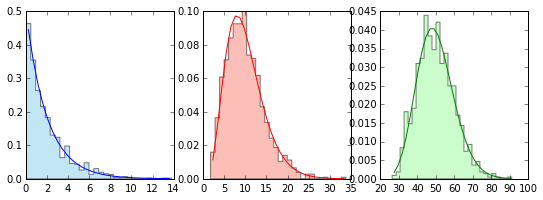

In [5]:
%matplotlib inline

import numpy as np
import math as mt
import matplotlib.pyplot as plt

def probchisq(x,ndof):  #pdf for chi-squared
    return 0.5*np.power(x/2,ndof/2.0-1)*np.exp(-x/2.0)/mt.gamma(ndof/2.0)

nbins = 30
x1=np.zeros(nbins)
x2=np.zeros(nbins)
x3=np.zeros(nbins)

ndof1 = 2
ndof2 = 10
ndof3 = 50

xdata1 = np.random.chisquare(ndof1,1000)
xdata2 = np.random.chisquare(ndof2,1000)
xdata3 = np.random.chisquare(ndof3,1000)

xmean1 = xdata1.mean()
xsig1 = xdata1.std()
xvar1 = xsig1*xsig1

xmean2 = xdata2.mean()
xsig2 = xdata2.std()
xvar2 = xsig2*xsig2

xmean3 = xdata3.mean()
xsig3 = xdata3.std()
xvar3 = xsig3*xsig3

print('For NDOF = ',ndof1,', mean = %5.3f'%xmean1,' and variance = %5.3f'%xvar1)
print('For NDOF = ',ndof2,', mean = %5.3f'%xmean2,' and variance = %5.3f'%xvar2)
print('For NDOF = ',ndof3,', mean = %6.3f'%xmean3,' and variance = %7.3f'%xvar3)

plt.figure(1,figsize=(9,3))
plt.subplot(131)
counts,bins,patches = plt.hist(xdata1,nbins,normed=True,histtype='stepfilled',facecolor='skyblue',alpha=0.5)

for i in range(len(bins)-1):
    x1[i] = 0.5*(bins[i]+bins[i+1])
    
plt.plot(x1,probchisq(x1,ndof1),'b')

plt.subplot(132)
counts,bins,patches = plt.hist(xdata2,nbins,normed=True,histtype='stepfilled',facecolor='salmon',alpha=0.5)

for i in range(len(bins)-1):
    x2[i] = 0.5*(bins[i]+bins[i+1])
    
plt.plot(x2,probchisq(x2,ndof2),'r')

plt.subplot(133)
counts,bins,patches = plt.hist(xdata3,nbins,normed=True,histtype='stepfilled',facecolor='palegreen',alpha=0.5)

for i in range(len(bins)-1):
    x3[i] = 0.5*(bins[i]+bins[i+1])
    
plt.plot(x3,probchisq(x3,ndof3),'g')

If your reduced &chi;<sup>2</sup> is much above 1, then your fit is not very good.  However, because the variance of the &chi;<sup>2</sup> depends on _N_<sub>dof</sub>, how "not very good" a given value of reduced &chi;<sup>2</sup> is depends on the number of degrees of freedom: in the above example, when _N_<sub>dof</sub> = 2, the probability of a reduced &chi;<sup>2</sup> &gt; 2 (i.e. &chi;<sup>2</sup> &gt; 4) is quite significant &ndash; there's a long tail in the blue histogram extending beyond 4 &ndash; whereas for _N_<sub>dof</sub> = 50, the probability of a reduced &chi;<sup>2</sup> &gt; 2 is tiny &ndash; 1000 entries drawn from a &chi;<sup>2</sup> distribution didn't produce any above 100.

To assess the significance of your &chi;<sup>2</sup>, you need to integrate the pdf between your value and infinity (that's the probability that you would get a value of &chi;<sup>2</sup> at least as large as the one you actually did get).  The Python **scipy.stats** package provides [a routine to calculate this](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html).  An example is given below.

In [15]:
import numpy as np
import scipy.stats as scs

ndof=np.zeros(6)
chi2meas=np.zeros(len(ndof))
chi2prob = np.zeros(len(ndof))

for i in range(len(chi2prob)):
    ndof[i] = 2*(1+i*i)
    chi2meas[i] = 2*ndof[i]
    chi2prob[i] = scs.chi2.sf(chi2meas[i],ndof[i])
    
print('Probability of a reduced \u03c7\u00b2 of 2')
print('NDOF:')
print(ndof)
print('Probability:')
np.set_printoptions(precision=3)
print(chi2prob)


Probability of a reduced χ² of 2
NDOF:
[  2.   4.  10.  20.  34.  52.]
Probability:
[  1.353e-01   9.158e-02   2.925e-02   4.995e-03   4.736e-04   2.499e-05]


##&Delta;&chi;<sup>2</sup> and errors on parameters

Finding your best-fit parameters is only half the battle: you also need to determine the uncertainties on those parameters.  (Of course, a fitting package like **curve_fit** does this for you, but it is important to know _what_ it is doing.)

If the underlying scatter is Gaussian, then for a single parameter, the 1&sigma; errors (i.e. the 68% **confidence interval**, the region within which 68% of repeated experimental measurements would lie) is given by the point at which the value of &chi;<sup>2</sup> has increased by 1: &chi;<sup>2</sup><sub>1&sigma;</sub> = &chi;<sup>2</sup><sub>min</sub> + 1.  For two parameters, find the global best fit and look for the contour corresponding to &chi;<sup>2</sup><sub>1&sigma;</sub> = &chi;<sup>2</sup><sub>min</sub> + 2.30.

The &Delta;&chi;<sup>2</sup> corresponding to 1&sigma; depends on the confidence interval you wish to define (common ones are 1&sigma; (68%), 90%, 95% and 99%) and on the number of parameters in your fit.  Here is a table from _Numerical Recipes in C_ (Cambridge University Press, 1988-1992):

_p_|_N_<sub>par</sub> = 1 | 2 | 3 | 4 | 5 | 6 
---|---------------------:|:-:|:-:|:-:|:-:|:-:
68.3%| 1.00 | 2.30 | 3.53 | 4.72 | 5.89 | 7.04 
90%  | 2.71 | 4.61 | 6.25 | 7.78 | 9.24 | 10.6 
95.4%| 4.00 | 6.17 | 8.02 | 9.70 | 11.3 | 12.8 
99%  | 6.63 | 9.21 | 11.3 | 13.3 | 15.1 | 16.8 
99.73%| 9.00 | 11.8 | 14.2 | 16.3 | 18.2 | 20.1 
99.99%| 15.1 | 18.4 | 21.1 | 23.5 | 25.7 | 27.8 

In the example below, we calculate the 68%, 90%, 95.4% and 99% confidence regions for the gradient and intercept of a straight line fit.  Notice that the contours show the negative correlation of _m_ and _c_ that we saw [earlier](variance.ipynb).

True slope = 0.750 , intercept = 0.200 , y error bar = 0.400
Best fit slope = 0.761 ± 0.030
Best fit intercept = 0.133 ± 0.173
Internal estimate of y error bar = 0.401
χ² = 18.063 ; χ²/NDOF = 1.004


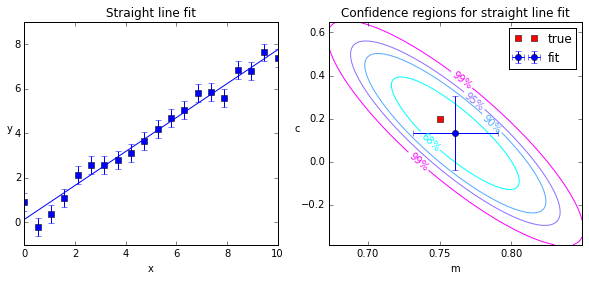

In [27]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#define a function to return the gradient and intercept of a straight line with their variances
def linest(x,y):
    xmean = x.mean()
    m = ((x-xmean)*y).sum()/((x-xmean)*x).sum()
    c = y.mean()-m*xmean
    yfit = m*x + c
    varm = (y*y-2*y*yfit+yfit*yfit).sum()/((x-xmean)*x).sum()/(len(x)-2)
    varc = varm*(x*x).mean()
    return m,c,varm,varc

#true properties of our straight line 
mtrue = 0.75
ctrue = 0.20
sigytrue = 0.40

print('True slope = %5.3f'%mtrue,', intercept = %5.3f'%ctrue,', y error bar = %5.3f'%sigytrue)

xmin = 0.0
xmax = 10.0
nbins = 20

x = np.linspace(xmin,xmax,nbins)
dy = np.random.normal(ctrue,sigytrue,nbins)  #random numbers normally distributed about ctrue
y = mtrue*x + dy                             #y points are scattered around mx + c with error sigytrue

mhat,chat,varm,varc = linest(x,y)            #fit these data 
sigmam = np.sqrt(varm)
sigmac = np.sqrt(varc)
xmean = x.mean()
ymean = y.mean()
yvar = (y-mhat*x-chat)*(y-mhat*x-chat)
ysig = np.sqrt(yvar.sum()/(nbins-2))
chi2min = yvar.sum()/(sigytrue*sigytrue)
chi2red = chi2min/(nbins-2)

print('Best fit slope = %5.3f'%mhat,'\u00b1 %5.3f'%sigmam)
print('Best fit intercept = %5.3f'%chat,'\u00b1 %5.3f'%sigmac)
print('Internal estimate of y error bar = %5.3f'%ysig)
print('\u03c7\u00b2 = %5.3f'%chi2min,'; \u03c7\u00b2/NDOF = %5.3f'%chi2red)

mmin = mhat - 3*sigmam
mmax = mhat + 3*sigmam
cmin = chat - 3*sigmac
cmax = chat + 3*sigmac
nstrips = 100
chi2 = np.zeros((nstrips,nstrips))

mrange=np.linspace(mmin,mmax,nstrips)   #Scan the region around the fit and produce a chi-square map
crange=np.linspace(cmin,cmax,nstrips)
im = 0
for m in mrange:
    ic = 0
    for c in crange:
        yvc = ((y-m*x-c)*(y-m*x-c))/(sigytrue*sigytrue)
        chi2[im,ic] = yvc.sum()
        ic = ic+1
    im = im+1 

plt.figure(1,figsize=(10,4)) 

plt.subplot(121)
plt.errorbar(x,y,yerr=0.4,fmt='bs',label='data')
plt.plot(x,mhat*x+chat,'b',label='fit')
plt.title('Straight line fit')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
    
levels = [chi2min+2.30,chi2min+4.61,chi2min+6.17,chi2min+9.21] #68, 90 and 99% confidence intervals
level_labels = ['68%','90%','95%','99%']
fmt={}  #fmt is a dictionary
for i,s in zip(levels,level_labels): #zip gives you two indices, one from each argument
    fmt[i]=s   #associate level with level_label in the dictionary

plt.subplot(122)
CS=plt.contour(mrange,crange,chi2,levels,cmap='cool')  #contour plot of chisquare, contours set by "levels"
    
plt.clabel(CS,inline=1,fmt=fmt,fontsize=10)  #label the contours, using the dictionary fmt defined earlier

plt.errorbar(mhat,chat,xerr=sigmam,yerr=sigmac,fmt='o',label='fit') 
plt.plot(mtrue,ctrue,'rs',label='true')
plt.legend(loc='best')
plt.title('Confidence regions for straight line fit') 
plt.xlabel('m')  
plt.ylabel('c',rotation=0)

##Maximum likelihood

The disadvantage of &chi;<sup>2</sup> fitting is that it implicitly depends on the assumption that the underlying variation is Gaussian, i.e. that the scatter in your _y_ values follows a Gaussian distribution.  If this is not the case, then the result may not really represent the best fit, and the errors on the fit parameters will not be trustworthy.

This is not a trivial restriction.  For example, we saw [earlier](pdfs.ipynb) that the uncertainty on the number of events in a histogram bin is described by the Poisson distribution, not the Gaussian, and for small numbers of events the two are not the same &ndash; in particular, the Poisson is asymmetrical about its mean.  A common alternative fitting procedure is the **method of maximum likelihood**.

In the maximum likelihood method, we take each point (_x_<sub>i</sub>, _y_<sub>i</sub>) and calculate the probability _P_(_y_<sub>i</sub>|_f_<sub>**a**</sub>(_x_<sub>i</sub>)) of observing _y_<sub>i</sub> if the true value is _f_<sub>**a**</sub>(_x_<sub>i</sub>), where **a** is the vector of parameters _a_<sub>k</sub> used by function _f_.  We then construct the likelihood &Lscr; by multiplying all these probabilities together:
$$
{\cal L} = \prod_i P\left(y_i|f_{\mathbf{a}}(x_i)\right).
$$

To obtain the maximum likelihood estimate of **a**, we &ndash; as the name suggests &ndash; need to maximise &#8466;.  For technical reasons, it is easier to use ln &#8466; (this converts the product into a sum, which is easier to handle), and because most optimisation techniques focus on minimisation rather than maximisation it is usual to consider &minus;ln &#8466;.

If the **residuals** _y_<sub>i</sub> &minus; _f_<sub>**a**</sub>(_x_<sub>i</sub>) are in fact Gaussian, the maximum likelihood method is identical to least squares; however, by using a different form for _P_, it can easily be adapted to cases where the distribution is not Gaussian.  In particular, it is straightforward to construct ln &#8466; for Poisson-distributed measurements.

The maximum likelihood method needs a bit more setting up than &chi;<sup>2</sup>, because you need a probability density function for your residuals, not just the function you want to fit.  Also, calculating the uncertainties, or confidence regions, in ML estimates is less obvious than for &chi;<sup>2</sup>.  On the other hand, ML is much more flexible than &chi;<sup>2</sup>, since you can use whatever probability density function you believe matches your data.

Python can handle maximum likelihood fitting, although there are other languages (specifically [R](https://www.r-project.org/), which is purpose-built for statistical computing) in which it's probably easier.  There are some worked examples on the web: [a fit to a dataset with underestimated errors](http://dan.iel.fm/emcee/current/user/line/), where the likelihood is adjusted to fit the scale-up factor for the errors as well as the parameters of the straight line; [a zero-inflated Poisson model](http://austinrochford.com/posts/2015-03-03-mle-python-statsmodels.html) where non-zero data are Poisson distributed, but there are more zero counts than the Poisson distribution predicts; [a coin tossing example](http://python-for-signal-processing.blogspot.co.uk/2012/10/maximum-likelihood-estimation-maximum.html); [something-or-other in epidemiology](http://www.r-bloggers.com/evaluating-optimization-algorithms-in-matlab-python-and-r/) (also contains the R code, for anyone who happens to know R).  The main issue appears to be that there is no very obvious way to get the Python tools to spit out an uncertainty estimate for the parameters.